In [47]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [48]:
training_data = np.load("training_data.npy", allow_pickle=True)

In [49]:
train = training_data[:-500] #มีข้อมูลtrainประมาณ1500ตัว
test = training_data[-500:] #มีข้อมูลtest500ตัว

X_train = np.array([i[0] for i in train]).reshape(-1,128,128,3) / 255
y_train = np.array([i[1] for i in train])
X_test = np.array([i[0] for i in test]).reshape(-1,128,128,3) / 255
y_test = np.array([i[1] for i in test])

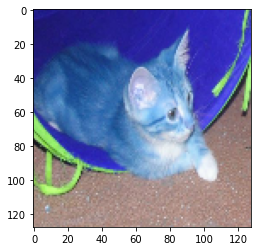

[1. 0.]


In [50]:
plt.imshow(training_data[0][0])
plt.show()
print(training_data[0][1])

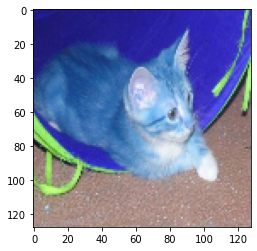

[1. 0.]


In [51]:
plt.imshow(X_train[0].reshape(128, 128 ,3))
plt.show()
print(y_train[0])

#Build Neural Network

In [52]:
base_model = tf.keras.applications.MobileNetV2(input_shape=(128,128,3), include_top=False, weights='imagenet')

9412608/9406464 [==============================] - 0s 0us/step


In [53]:
base_model.summary()

Model: "mobilenetv2_1.00_128"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 129, 129, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 64, 64, 32)   864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 64, 64, 32)   128         Conv1[0][0]                      
_______________________________________________________________________________

In [54]:
base_model.trainable = False #Freezeทั้งหมดนี้ไว้ เพื่อเทรนheadก่อน

## Custom head

In [56]:
average_pooling_layer = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)
prediction_layer = tf.keras.layers.Dense(units=2, activation='softmax')(average_pooling_layer)

In [57]:
model = tf.keras.models.Model(inputs=base_model.input, outputs=prediction_layer)

In [58]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 129, 129, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 64, 64, 32)   864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 64, 64, 32)   128         Conv1[0][0]                      
______________________________________________________________________________________________

In [59]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [60]:
model.fit(X_train, y_train, epochs=25, validation_data=(X_test, y_test), batch_size=128)

Epoch 1/25
12/12 [==============================] - 3s 285ms/step - loss: 0.6649 - accuracy: 0.6179 - val_loss: 0.5472 - val_accuracy: 0.7260
Epoch 2/25
12/12 [==============================] - 2s 137ms/step - loss: 0.5310 - accuracy: 0.7295 - val_loss: 0.4572 - val_accuracy: 0.7900
Epoch 3/25
12/12 [==============================] - 2s 137ms/step - loss: 0.4507 - accuracy: 0.7842 - val_loss: 0.3925 - val_accuracy: 0.8260
Epoch 4/25
12/12 [==============================] - 2s 138ms/step - loss: 0.3900 - accuracy: 0.8277 - val_loss: 0.3421 - val_accuracy: 0.8620
Epoch 5/25
12/12 [==============================] - 2s 137ms/step - loss: 0.3437 - accuracy: 0.8591 - val_loss: 0.3034 - val_accuracy: 0.8780
Epoch 6/25
12/12 [==============================] - 2s 135ms/step - loss: 0.3063 - accuracy: 0.8778 - val_loss: 0.2728 - val_accuracy: 0.8900
Epoch 7/25
12/12 [==============================] - 2s 133ms/step - loss: 0.2768 - accuracy: 0.8925 - val_loss: 0.2488 - val_accuracy: 0.9080
Epoch 

*แค่นี้ก็ accuracy: 0.9526 val_accuracy: 0.9500 แล้ว จะทำFine Tuningจิงๆเหรอ*

## Fine Tuning

In [61]:
len(base_model.layers)

155

In [62]:
base_model.trainable = True #Unfreeze

In [63]:
for i in base_model.layers[:100]: #Freeze เลเยอร์บางส่วน
  i.trainable = False                   

In [64]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [65]:
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=128)

Epoch 1/10
12/12 [==============================] - 3s 280ms/step - loss: 0.1596 - accuracy: 0.9385 - val_loss: 0.0947 - val_accuracy: 0.9600
Epoch 2/10
12/12 [==============================] - 2s 173ms/step - loss: 0.0144 - accuracy: 1.0000 - val_loss: 0.0945 - val_accuracy: 0.9680
Epoch 3/10
12/12 [==============================] - 2s 175ms/step - loss: 0.0074 - accuracy: 1.0000 - val_loss: 0.1018 - val_accuracy: 0.9660
Epoch 4/10
12/12 [==============================] - 2s 175ms/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 0.1313 - val_accuracy: 0.9640
Epoch 5/10
12/12 [==============================] - 2s 173ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.1348 - val_accuracy: 0.9660
Epoch 6/10
12/12 [==============================] - 2s 174ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.1612 - val_accuracy: 0.9620
Epoch 7/10
12/12 [==============================] - 2s 174ms/step - loss: 4.5437e-04 - accuracy: 1.0000 - val_loss: 0.1711 - val_accuracy: 0.9580
Ep

*อ่ะ overfitting เลยเป็นไงล่ะ*